In [1]:
import torch
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np
plt.style.use("default")
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "3"

# === Load labels from CSV ===
df = pd.read_csv("data/cancer_data_preprocessed.csv")
print(df.shape)
print(df.columns)
print(df['Cancer Stage'].unique())
y = df['Cancer Stage'].values

(38258, 10)
Index(['mutated_protein', 'wildtype_protein', 'Donor Age at Diagnosis',
       'Donor Sex', 'Tumour Grade', 'Donor Vital Status',
       'Donor Survival Time', 'Cancer Type', 'Histology Abbreviation',
       'Cancer Stage'],
      dtype='object')
[2 3 4 1]


In [ ]:
print(df['mutated_protein'].str.len().describe())

count    38258.000000
mean      1149.174081
std       2677.216104
min          6.000000
25%        350.000000
50%        644.000000
75%       1160.000000
max      35992.000000
Name: mutated_protein, dtype: float64


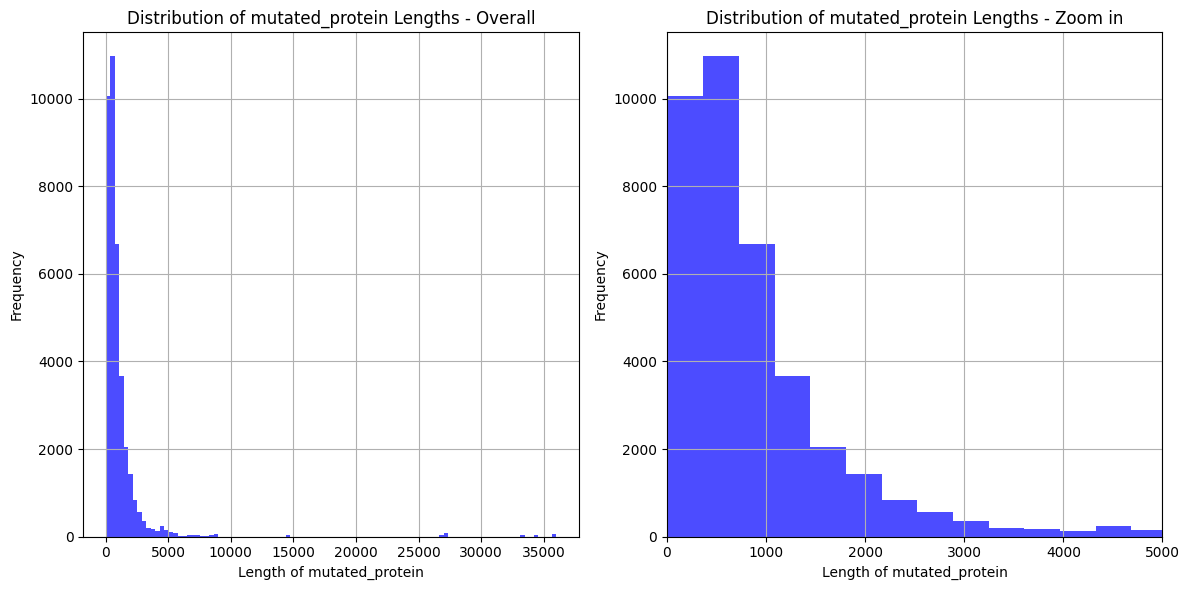

In [11]:
# 绘制mutated_protein长度分布图
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df['mutated_protein'].str.len(), bins=100, color='blue', alpha=0.7)
plt.title('Distribution of mutated_protein Lengths - Overall')
plt.xlabel('Length of mutated_protein')
plt.ylabel('Frequency')
plt.grid()

plt.subplot(1, 2, 2)
plt.hist(df['mutated_protein'].str.len(), bins=100, color='blue', alpha=0.7)
plt.title('Distribution of mutated_protein Lengths - Zoom in')
plt.xlim(0, 5000)
plt.xlabel('Length of mutated_protein')
plt.ylabel('Frequency')
plt.grid()

plt.tight_layout()
plt.show()

In [2]:
path_finetuned = "data/finetuned_delta_embeddings.pt"
path_original = "data/esm2_delta_embeddings.pt"  # optional

finetuned = torch.load(path_finetuned)
original = torch.load(path_original)  # optional
X_ft = finetuned["X"].numpy()
X_orig = original["X"].numpy()  # optional
print(X_ft.shape)
print(X_orig.shape)  # optional

(7652, 320)
(38258, 320)


In [3]:
path_original = "data/esm2_delta_embeddings.pt"  
embeddings = torch.load(path_original)
# shape print
print(embeddings["X"].shape)

torch.Size([38258, 1, 1280])


⚠️ Aligning X and y to 7652 samples due to mismatch.
🔎 Sampling 3000 from 7652 for visualization...
🔎 Sampling 3000 from 38258 for visualization...


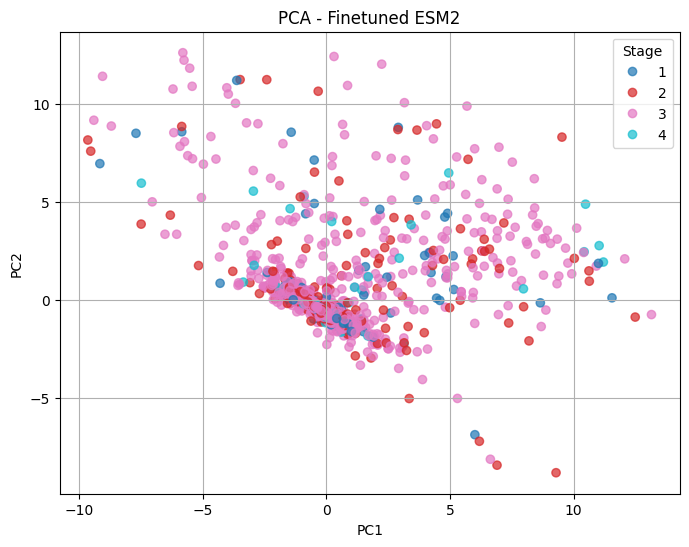

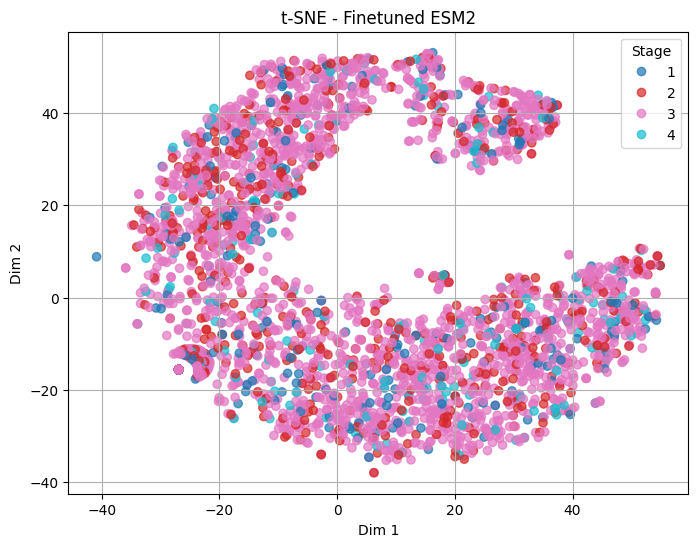

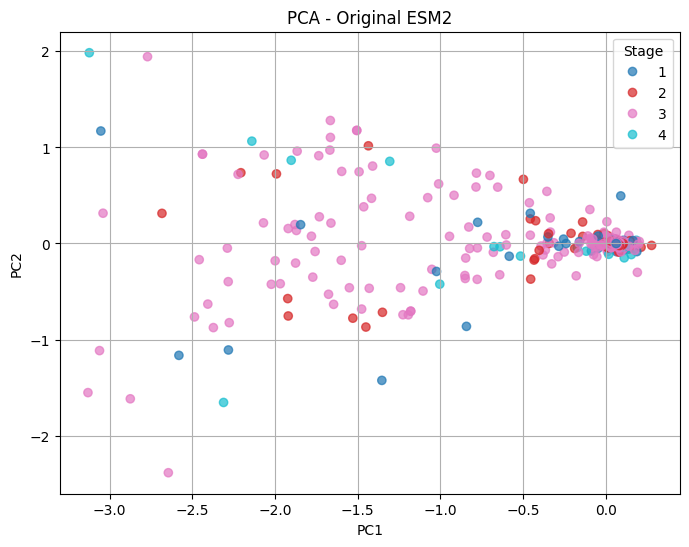

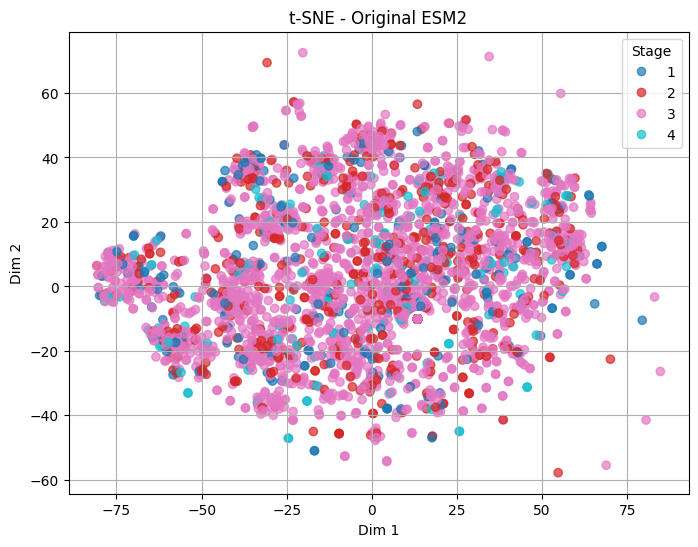

⚠️ Aligning X and y to 7652 samples due to mismatch.
🔎 Sampling 3000 from 7652 for visualization...
🔎 Sampling 3000 from 38258 for visualization...


KeyboardInterrupt: 

In [ ]:
# ESM2 Finetuned Delta Embedding Visualization

# === Load embeddings ===
path_finetuned = "data/finetuned_delta_embeddings.pt"
path_original = "data/esm2_delta_embeddings.pt"  # optional

finetuned = torch.load(path_finetuned)
X_ft = finetuned["X"].numpy()

# === Safe alignment ===
def align_X_y(X, y):
    if len(X) != len(y):
        min_len = min(len(X), len(y))
        print(f"⚠️ Aligning X and y to {min_len} samples due to mismatch.")
        return X[:min_len], y[:min_len]
    return X, y

X_ft, y_ft = align_X_y(X_ft, y)
if has_original:
    X_orig, y_orig = align_X_y(X_orig, y)

# === Optional: Sampling for visualization ===
MAX_SAMPLES = 3000
if len(X_ft) > MAX_SAMPLES:
    print(f"🔎 Sampling {MAX_SAMPLES} from {len(X_ft)} for visualization...")
    idx = np.random.choice(len(X_ft), MAX_SAMPLES, replace=False)
    X_ft = X_ft[idx]
    y_ft = y_ft[idx]

if has_original and len(X_orig) > MAX_SAMPLES:
    print(f"🔎 Sampling {MAX_SAMPLES} from {len(X_orig)} for visualization...")
    idx = np.random.choice(len(X_orig), MAX_SAMPLES, replace=False)
    X_orig = X_orig[idx]
    y_orig = y_orig[idx]

# === PCA Visualization ===
def visualize_pca(X, y, title):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap="tab10", alpha=0.7)
    plt.legend(*scatter.legend_elements(), title="Stage")
    plt.title(f"PCA - {title}")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid(True)
    plt.show()

# === t-SNE Visualization ===
def visualize_tsne(X, y, title):
    tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
    X_tsne = tsne.fit_transform(X)
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap="tab10", alpha=0.7)
    plt.legend(*scatter.legend_elements(), title="Stage")
    plt.title(f"t-SNE - {title}")
    plt.xlabel("Dim 1")
    plt.ylabel("Dim 2")
    plt.grid(True)
    plt.show()

# === Run Visualization ===
visualize_pca(X_ft, y_ft, "Finetuned ESM2")
visualize_tsne(X_ft, y_ft, "Finetuned ESM2")

if has_original:
    visualize_pca(X_orig, y_orig, "Original ESM2")
    visualize_tsne(X_orig, y_orig, "Original ESM2")
